# Productivity Prediction of Garment Employees

## Importing The Neccesary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR

import warnings
warnings.filterwarnings('ignore')

import pickle

## Loading The Dataset

In [2]:
df=pd.read_csv('garments_worker_productivity.csv')

In [3]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## Explore The Data

In [4]:
df.shape

(1197, 15)

In [5]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [7]:
df.sample(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
768,2/15/2015,Quarter3,sweing,Sunday,1,0.80,22.52,1420.0,6840,113,0.0,0,0,57.0,1.000230
789,2/16/2015,Quarter3,sweing,Monday,3,0.65,30.10,1263.0,600,63,0.0,0,1,58.0,0.802243
364,1/21/2015,Quarter3,sweing,Wednesday,1,0.65,22.94,1595.0,10260,34,0.0,0,0,57.0,0.700030
515,1/29/2015,Quarter5,sweing,Thursday,6,0.50,18.79,717.0,3960,23,0.0,0,0,33.0,0.500118
707,2/10/2015,Quarter2,finishing,Tuesday,9,0.80,3.94,NaN,960,0,0.0,0,0,8.0,0.689500


In [8]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


## Data Cleaning

#### Checking Null Values

In [11]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [12]:
df.isnull().mean()*100

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

### Treating The Null Value

In [13]:
df.dropna(inplace=True)

In [14]:
correlation_wip = df['wip'].corr(df['actual_productivity'])
print(f"Correlation between 'wip' and 'actual_productivity': {correlation_wip}")


Correlation between 'wip' and 'actual_productivity': 0.13114681991684474


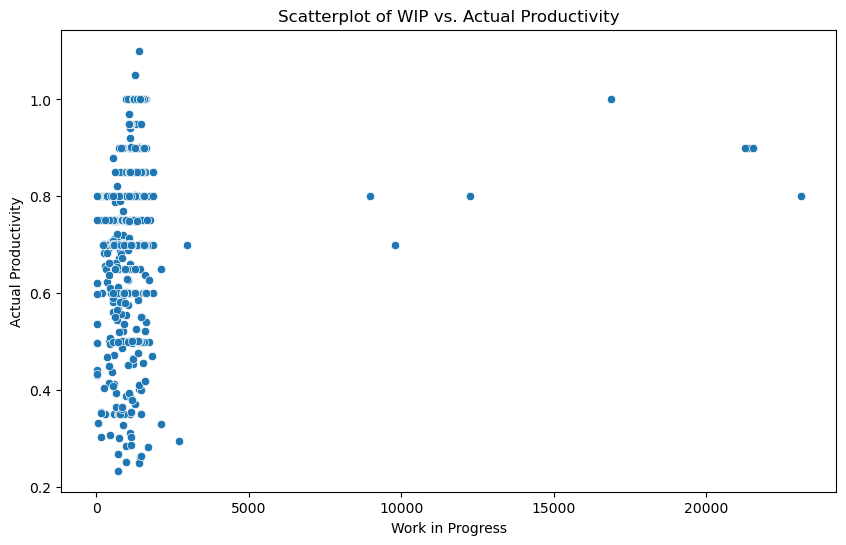

In [15]:
# Scatterplot of 'wip' vs. 'actual_productivity'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wip', y='actual_productivity', data=df)
plt.title('Scatterplot of WIP vs. Actual Productivity')
plt.xlabel('Work in Progress')
plt.ylabel('Actual Productivity')
plt.show()


In [16]:
df.drop('wip', axis=1, inplace=True)

In [17]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

### Checking Duplicate Values

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().mean()*100

date                     0.0
quarter                  0.0
department               0.0
day                      0.0
team                     0.0
targeted_productivity    0.0
smv                      0.0
over_time                0.0
incentive                0.0
idle_time                0.0
idle_men                 0.0
no_of_style_change       0.0
no_of_workers            0.0
actual_productivity      0.0
dtype: float64

In [20]:
df.idle_men.unique()

array([ 0, 10, 15, 45, 37, 30, 35, 20, 25, 40], dtype=int64)

In [21]:
df.idle_time.unique()

array([  0. ,  90. , 150. , 270. , 300. ,   2. ,   5. ,   8. ,   4.5,
         3.5,   4. ,   6.5])

In [22]:
df.no_of_style_change.unique()

array([0, 1, 2], dtype=int64)

In [23]:
df

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,4560,40,0.0,0,1,38.0,0.700246


## Exploratory Data Analysis


### UNIVARIATE ANALYSIS

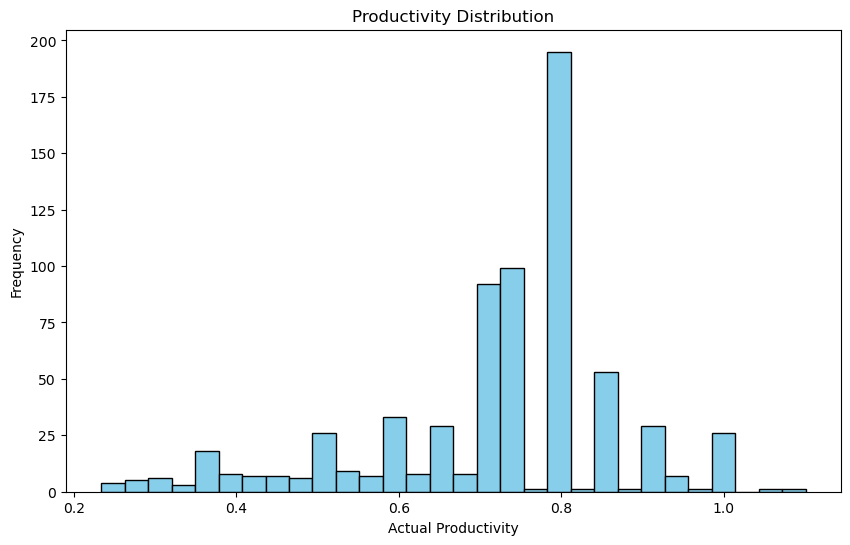

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['actual_productivity'], bins=30, edgecolor='black', color='skyblue')
plt.title('Productivity Distribution')
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.show()


### Histogram

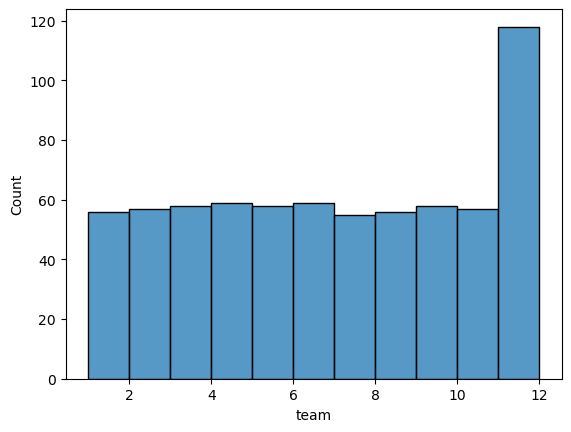

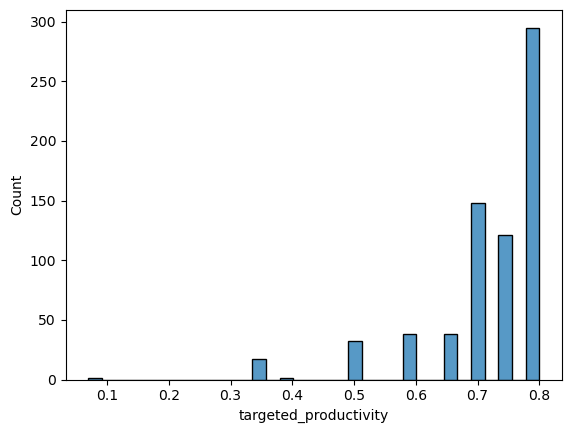

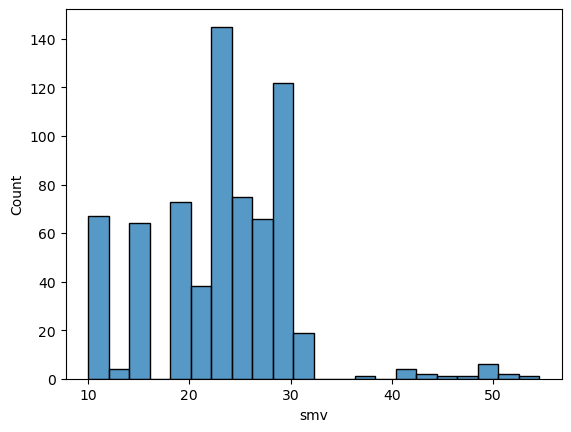

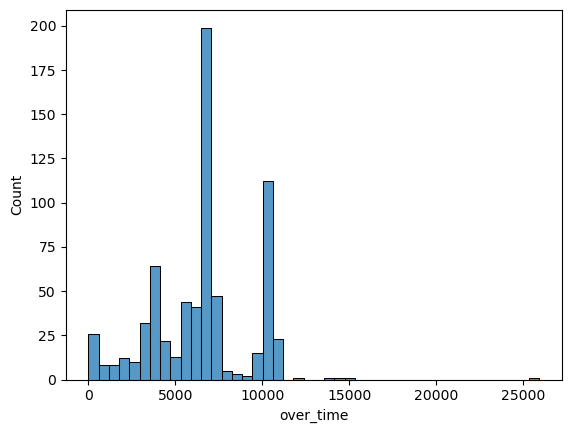

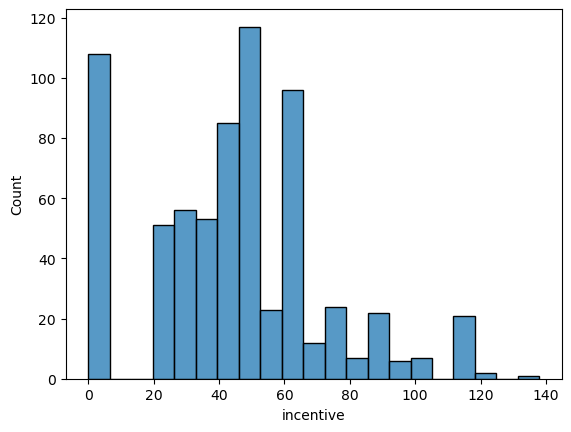

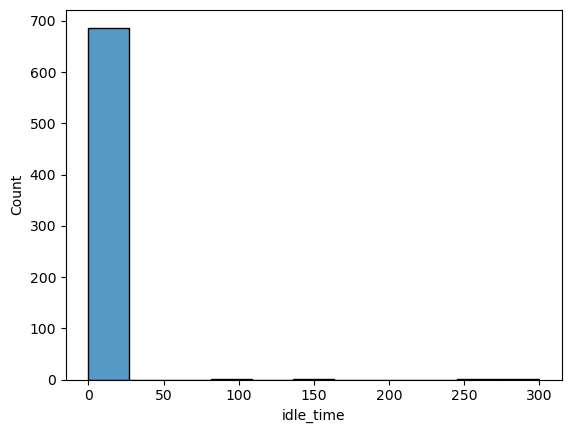

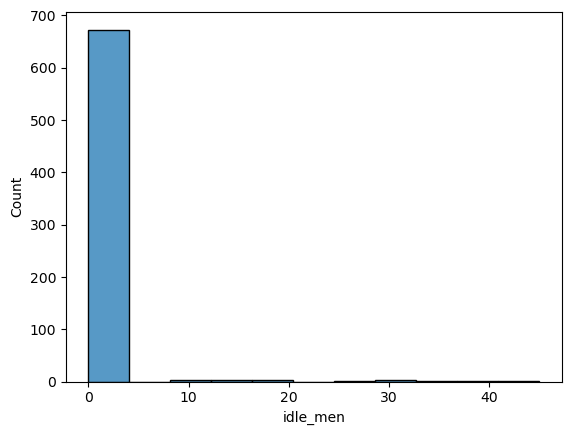

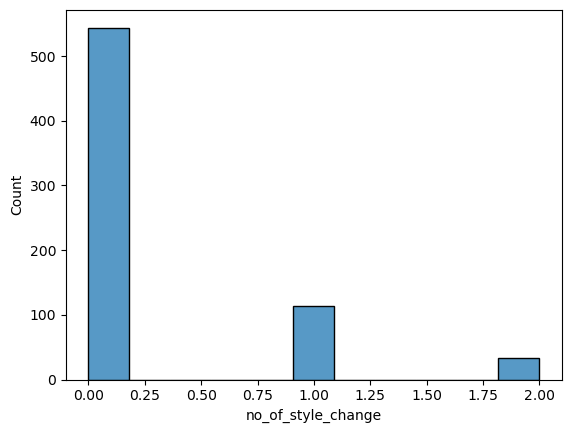

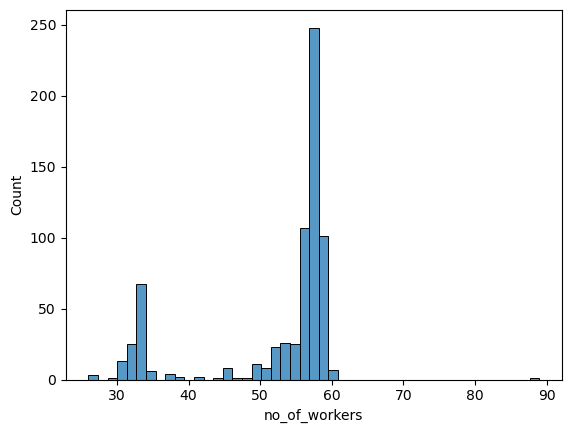

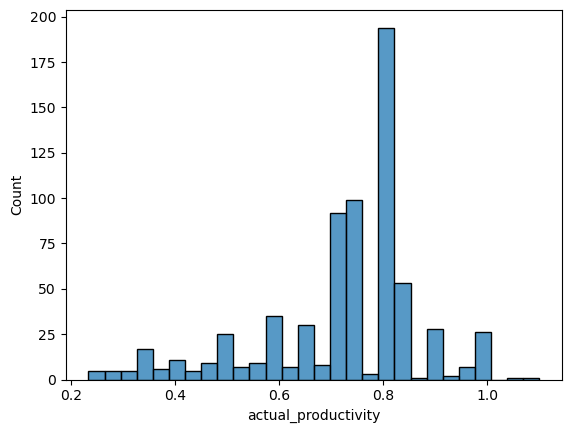

In [25]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.histplot(x=df[i],palette="Set2")
        plt.show();

### BOXPLOT

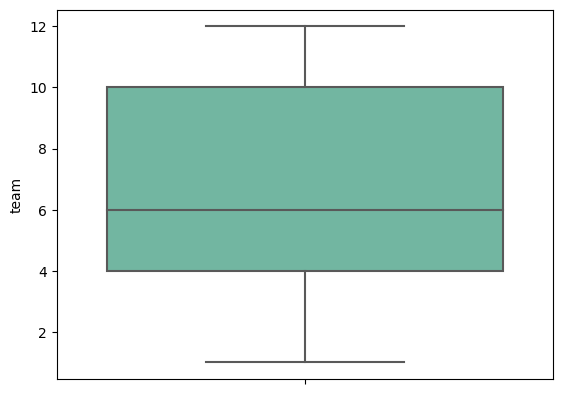

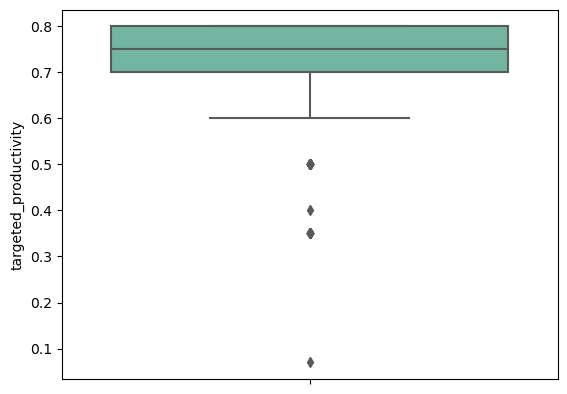

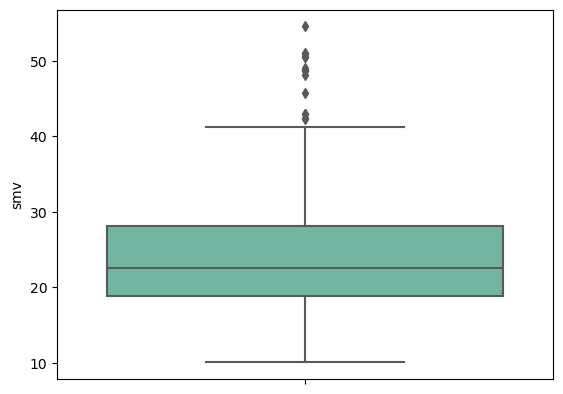

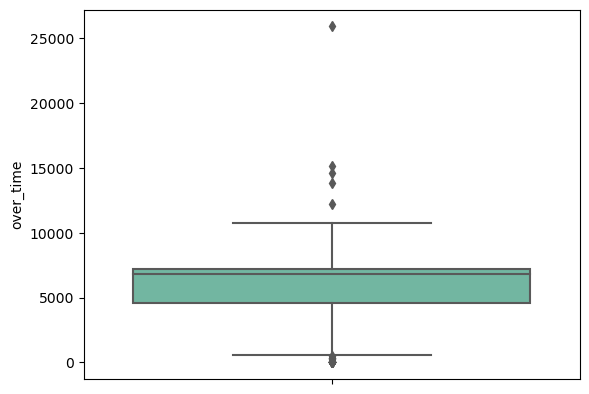

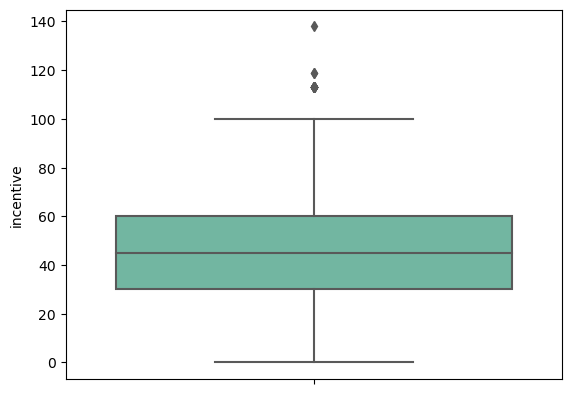

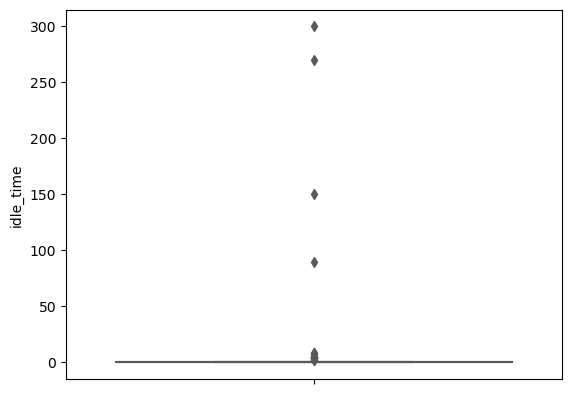

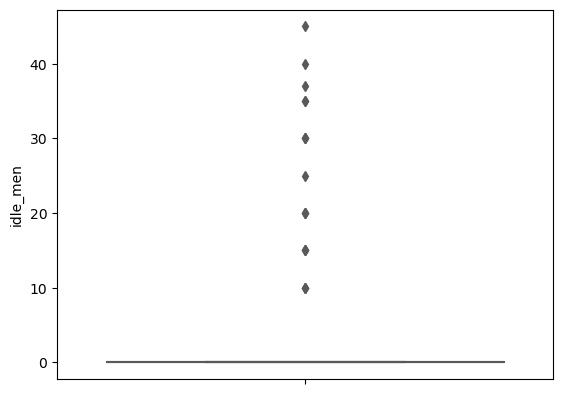

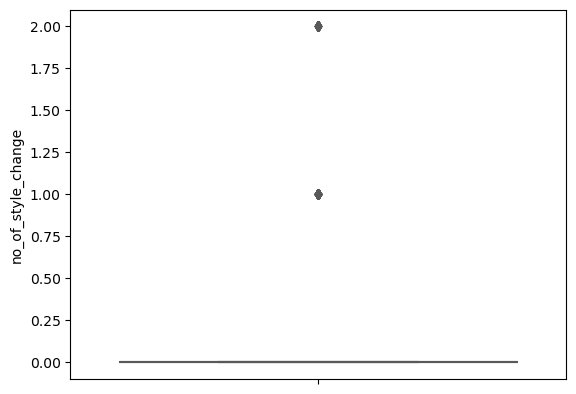

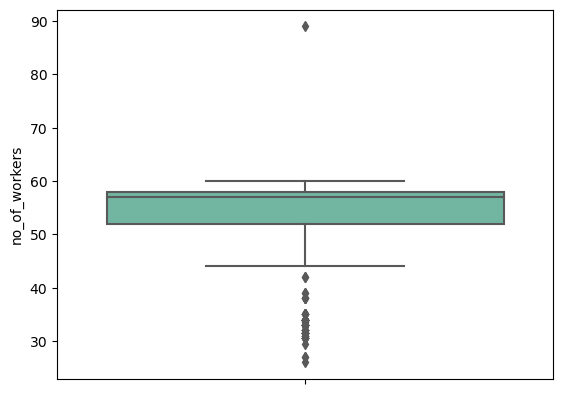

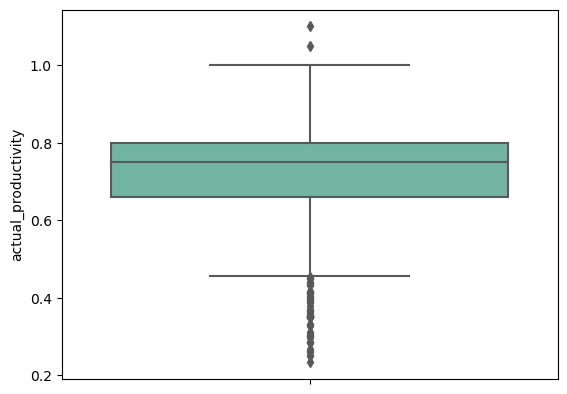

In [26]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i],palette="Set2")
        plt.show();

### KDE Plot

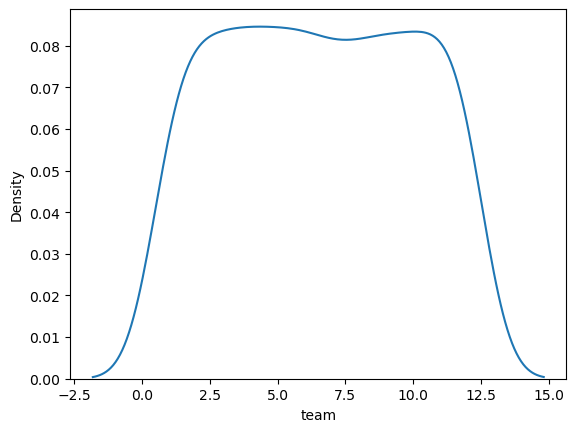

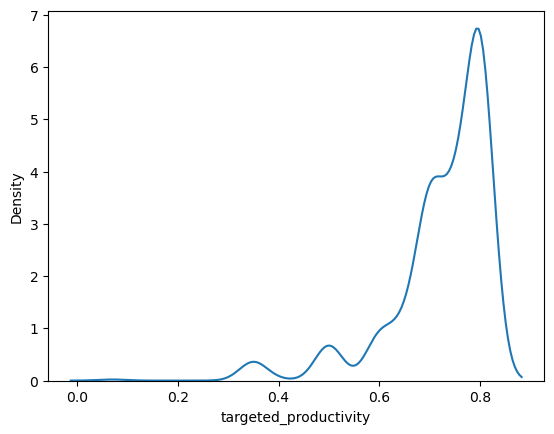

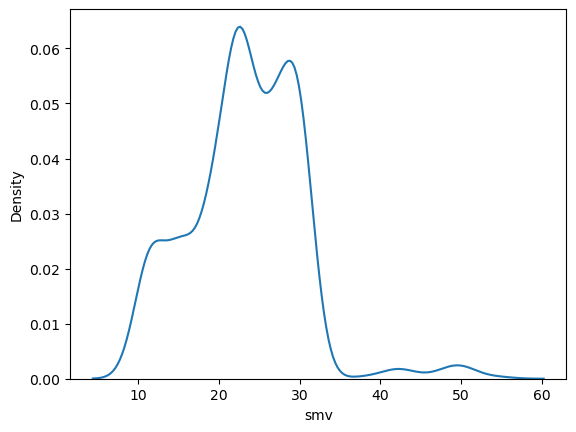

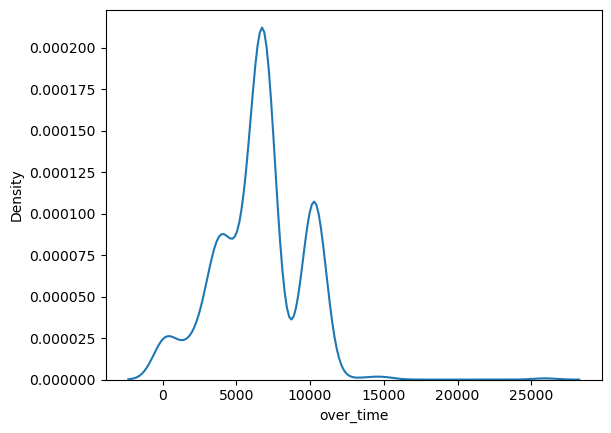

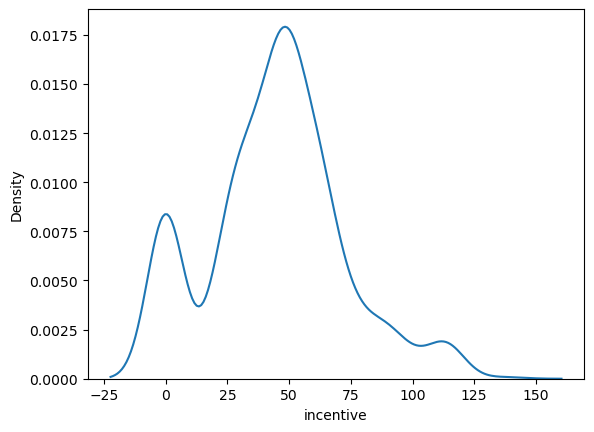

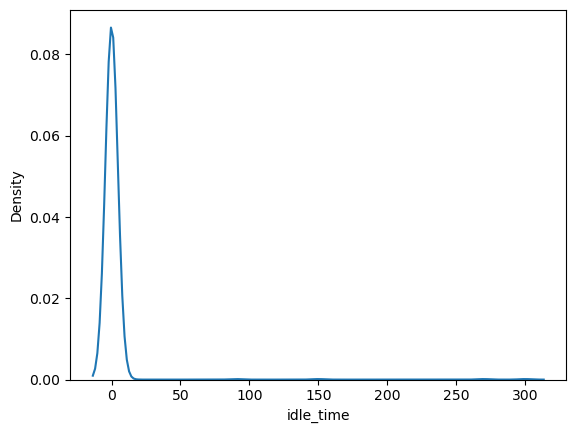

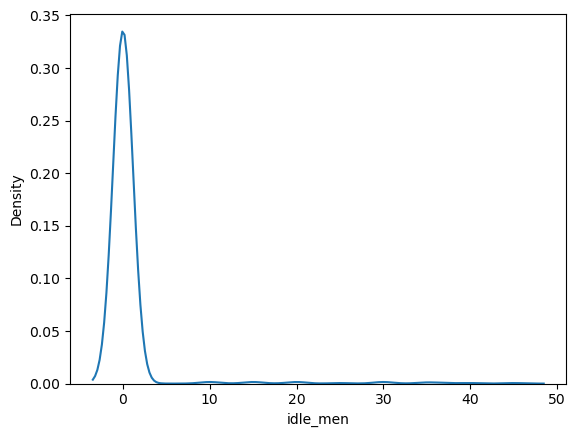

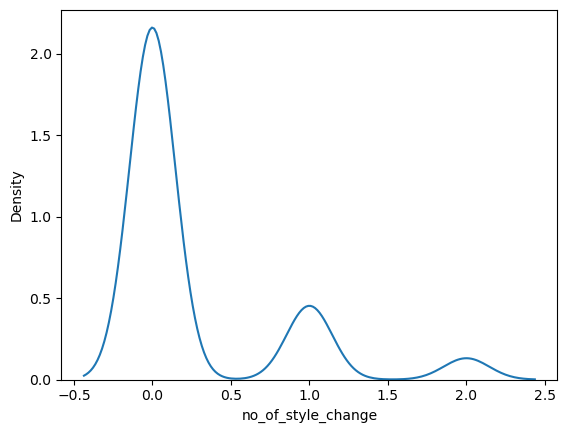

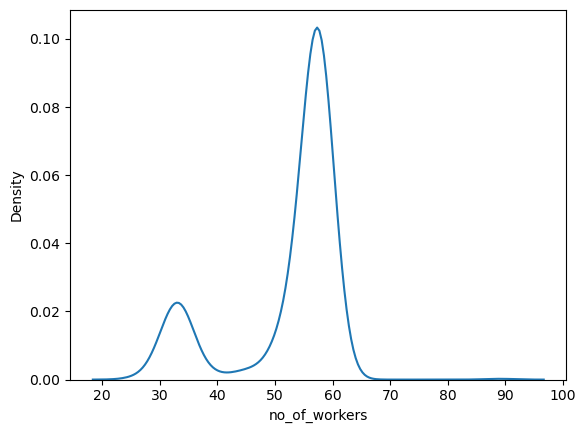

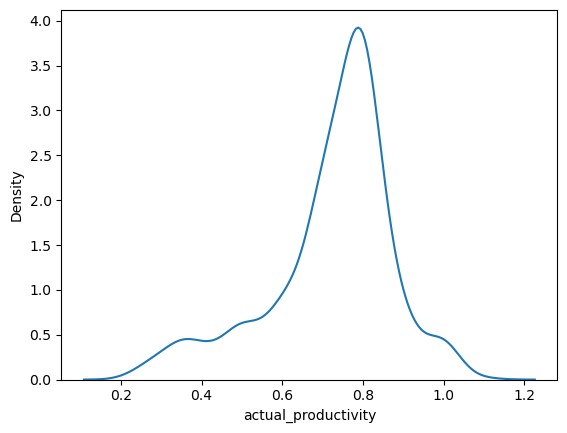

In [27]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.kdeplot(x=df[i],palette="Set2")
        plt.show();

## MULTIVARIATE ANALYSIS

### PAIRPLOT

<Figure size 1200x800 with 0 Axes>

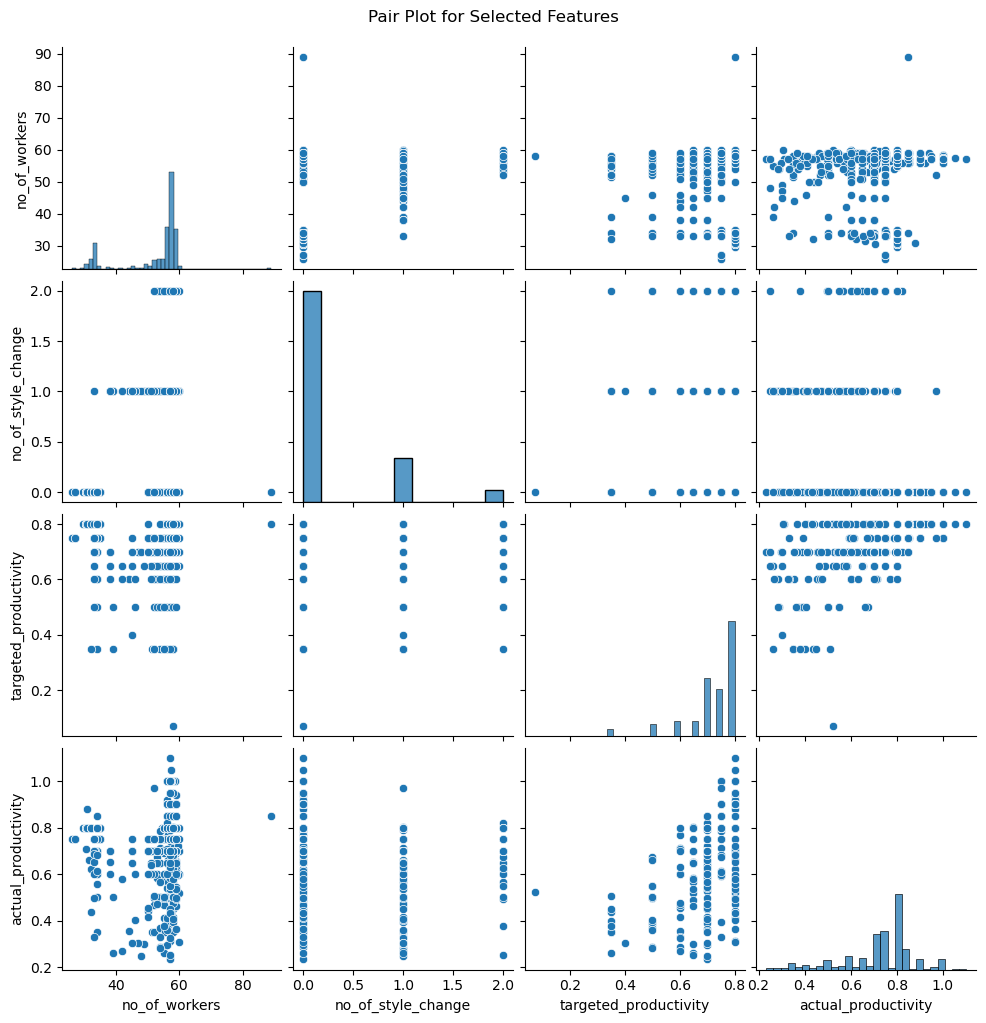

In [28]:
selected_features = ['no_of_workers', 'no_of_style_change', 'targeted_productivity', 'actual_productivity']

plt.figure(figsize=(12, 8))
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot for Selected Features', y=1.02)
plt.show()

### Correlation Heatmap

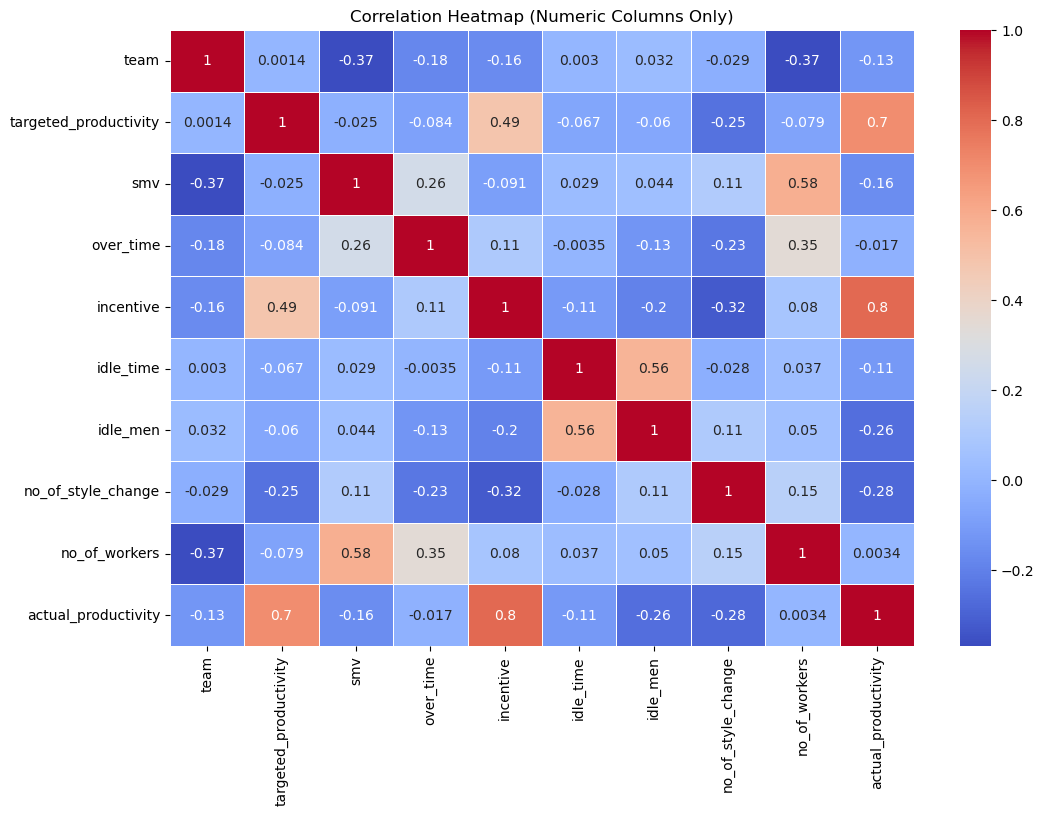

In [29]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


### VIOLIN PLOT

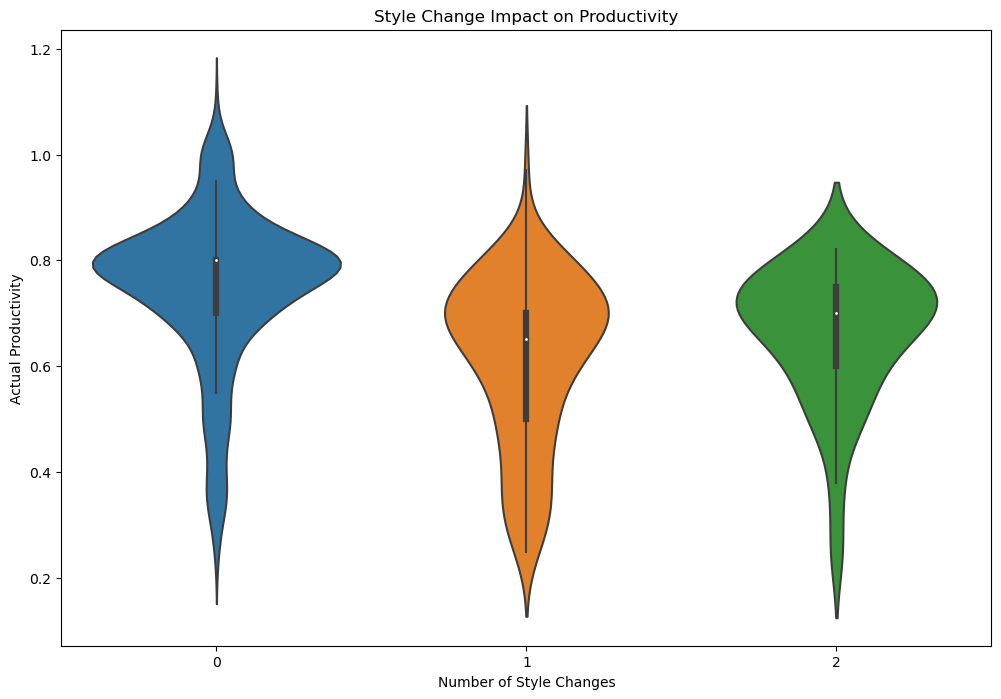

In [30]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='no_of_style_change', y='actual_productivity', data=df)
plt.title('Style Change Impact on Productivity')
plt.xlabel('Number of Style Changes')
plt.ylabel('Actual Productivity')
plt.show()


### Scatter Plot Matrix by Department

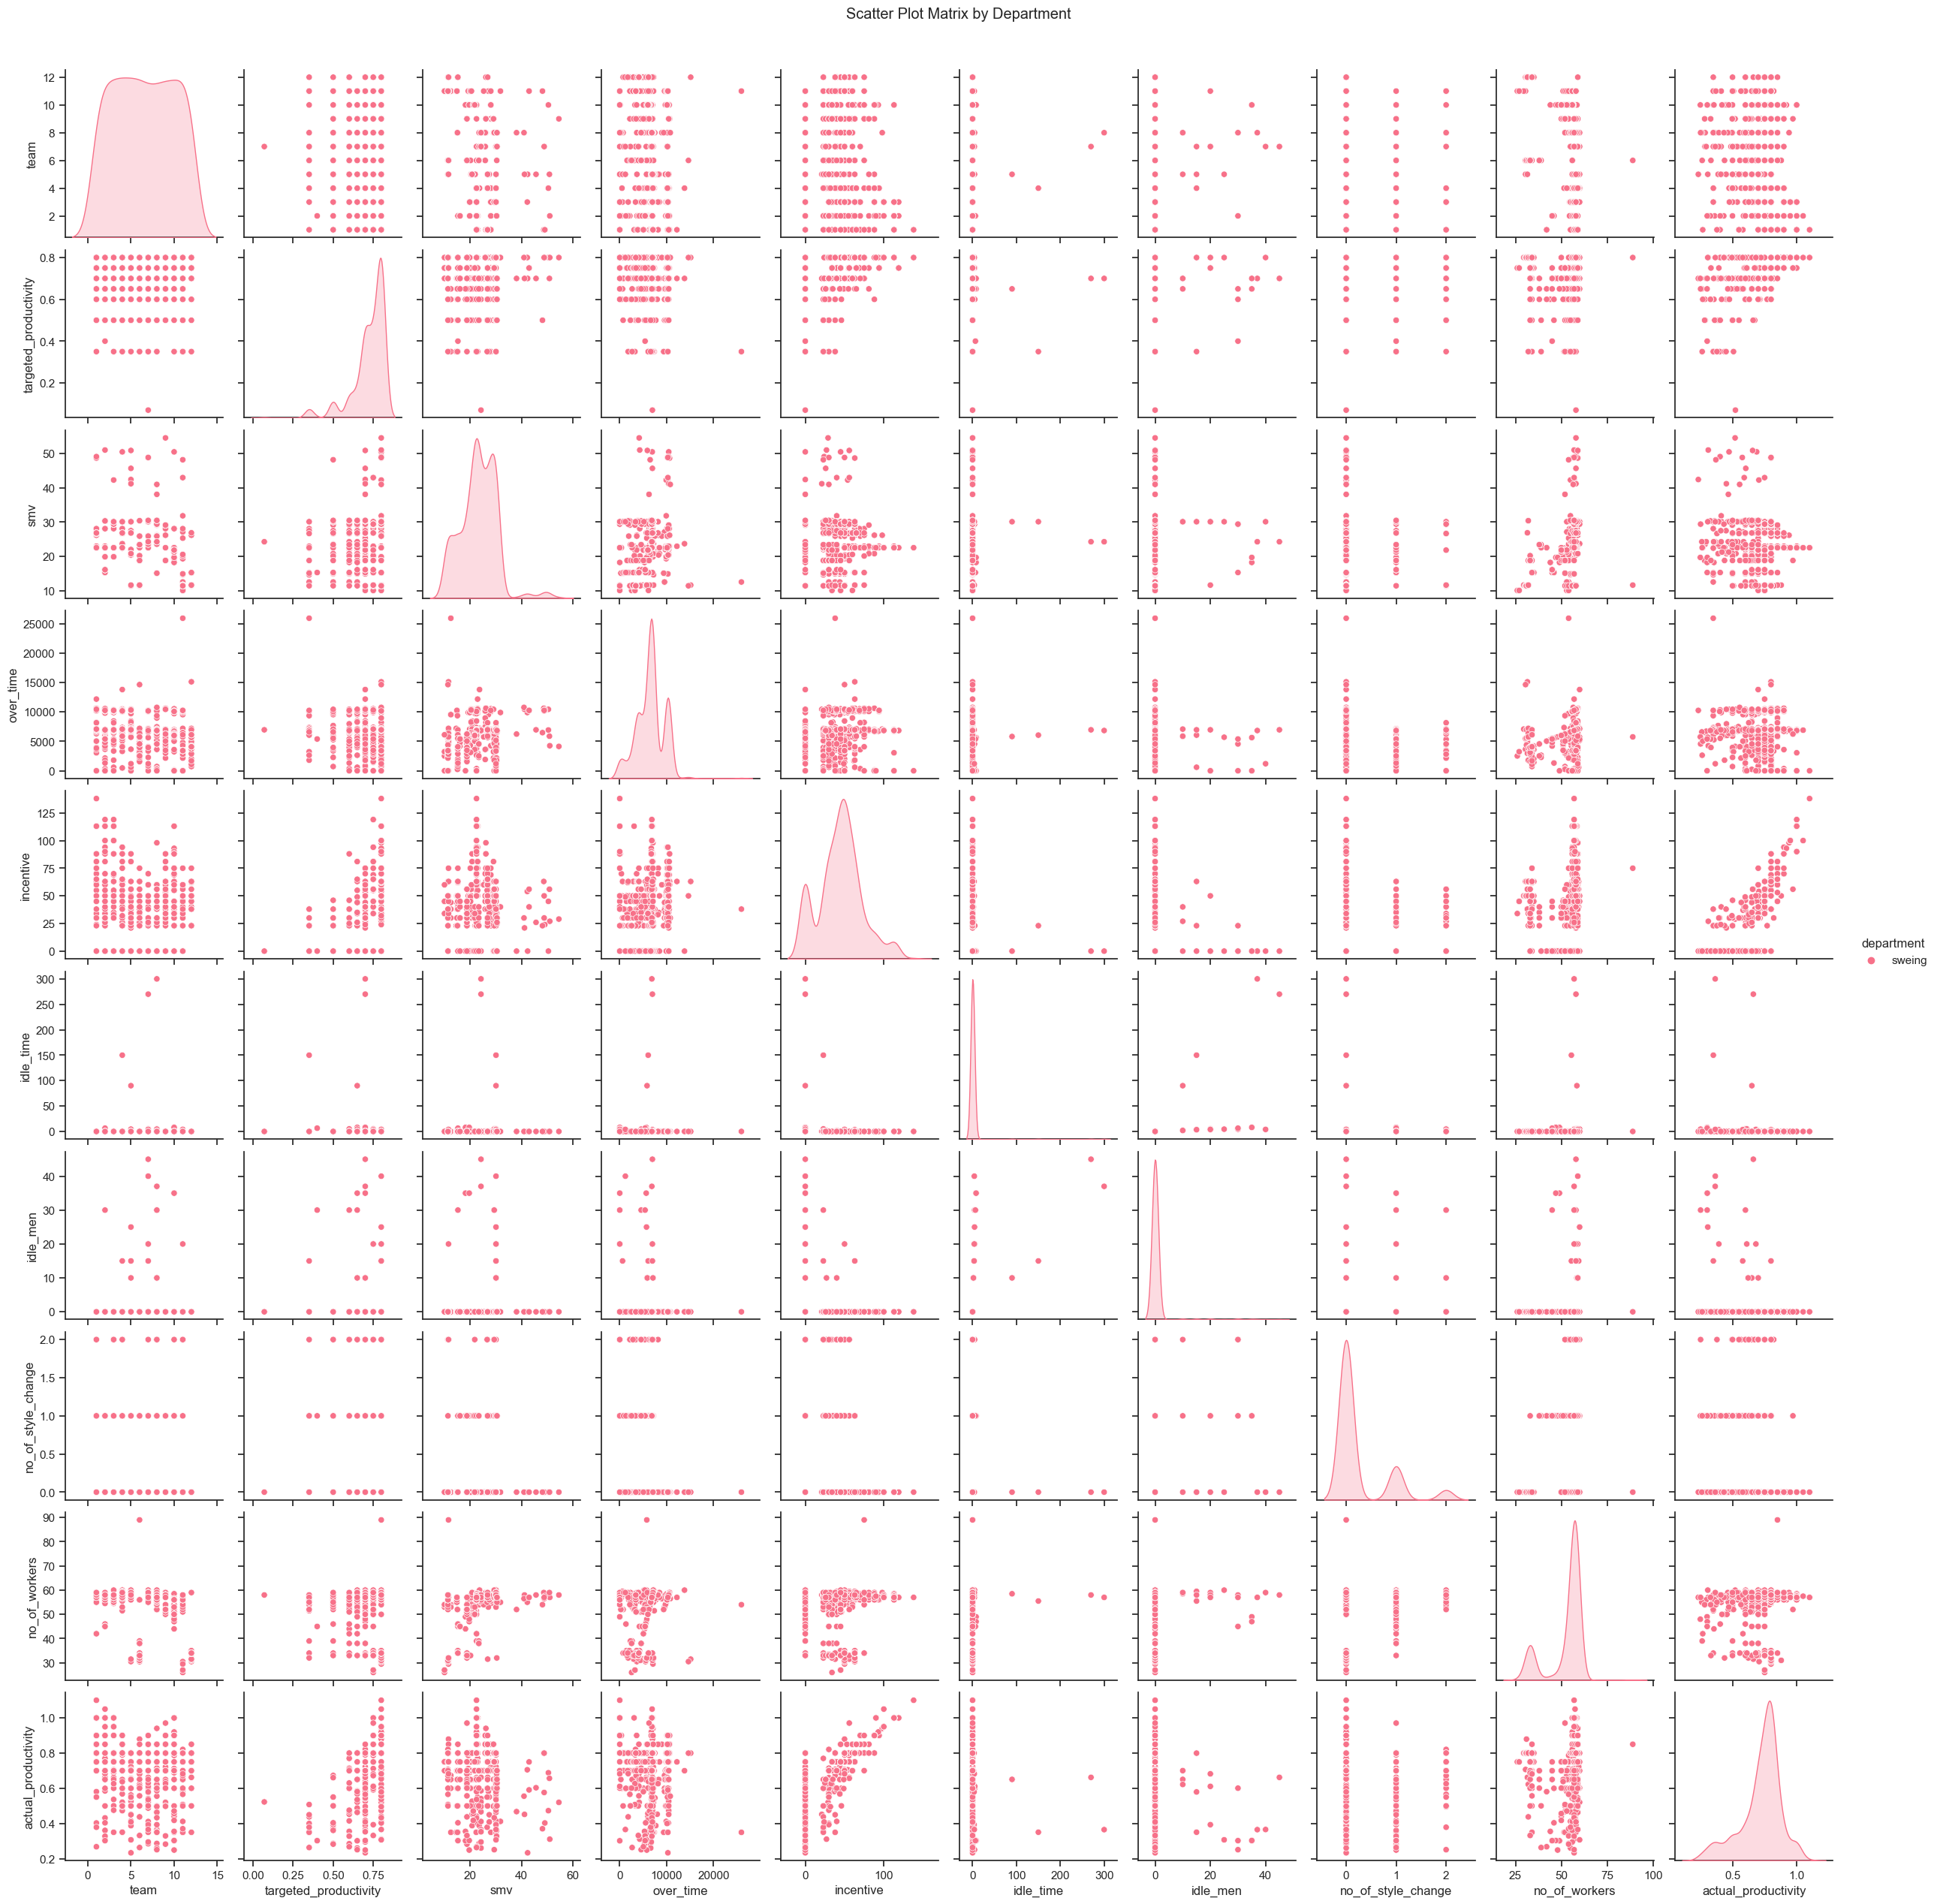

In [31]:
sns.set(style="ticks")
sns.pairplot(df, hue="department", markers=["o", "s", "D"], palette="husl")
plt.suptitle('Scatter Plot Matrix by Department', y=1.02)
plt.show()


## Data Preprocessing

### Encoding The Needed Object Column

In [32]:
label_encoder = LabelEncoder()
df['department_encoded'] = label_encoder.fit_transform(df['department'])


### TREATING THE OUTLIER

In [33]:
numeric_columns = df.select_dtypes(include=['number'])

In [34]:
def treat_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)

    return data

for column in numeric_columns.columns:
    df = treat_outliers_iqr(df, column)

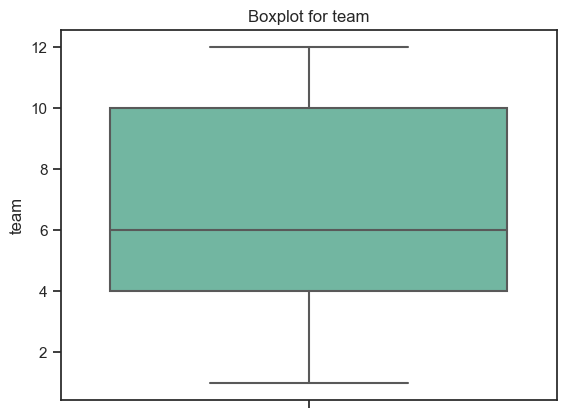

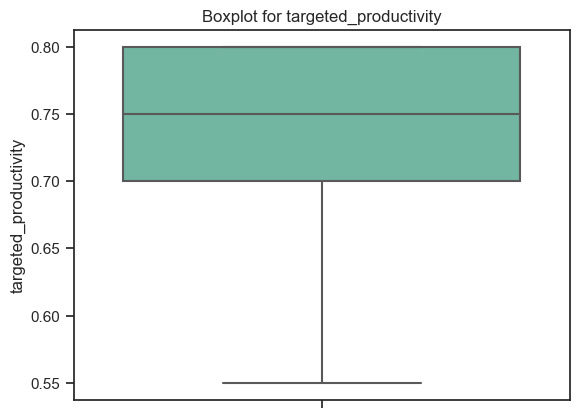

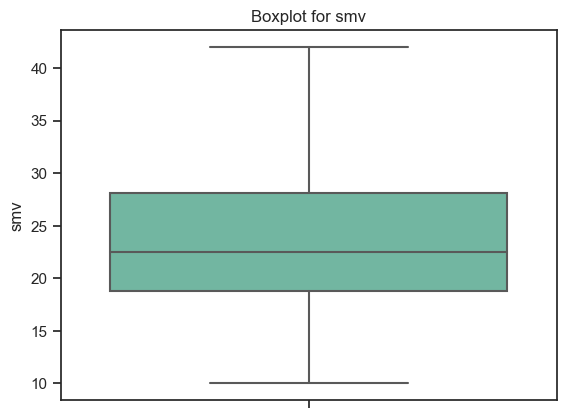

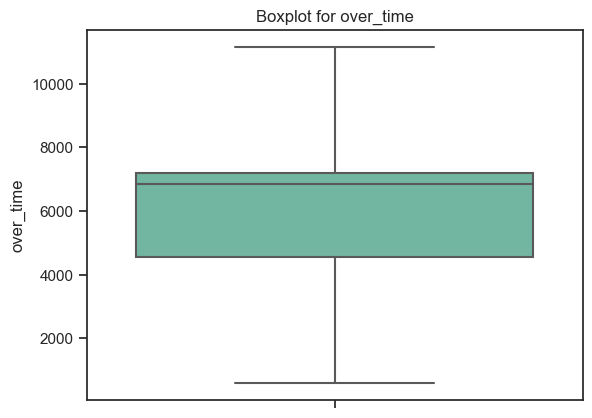

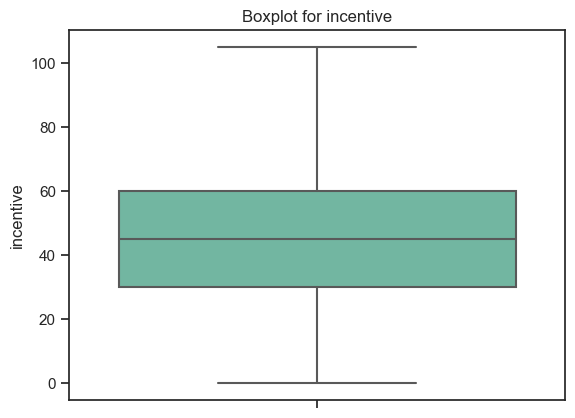

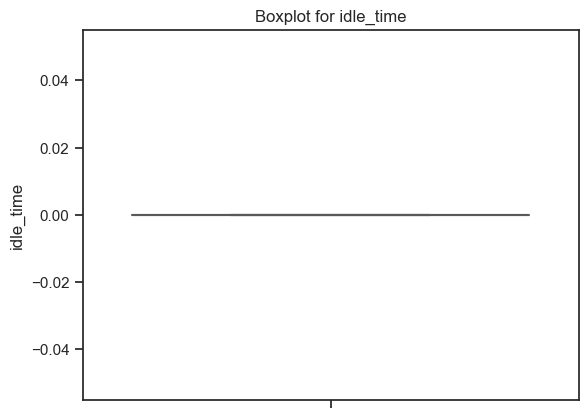

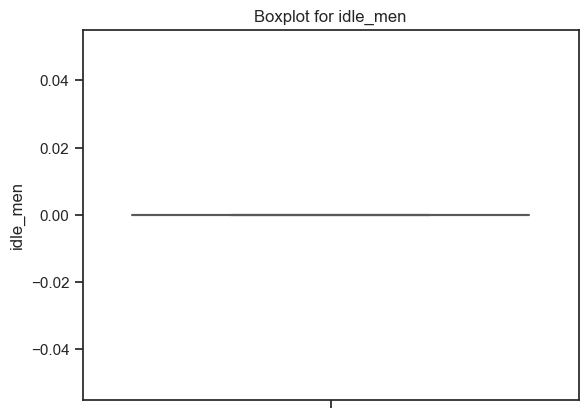

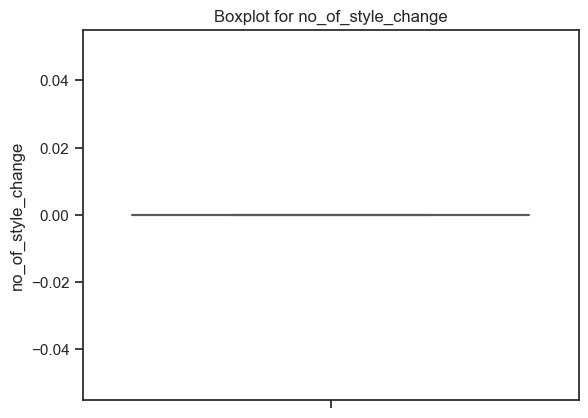

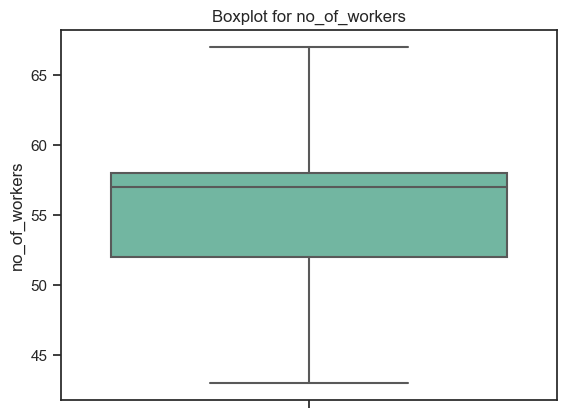

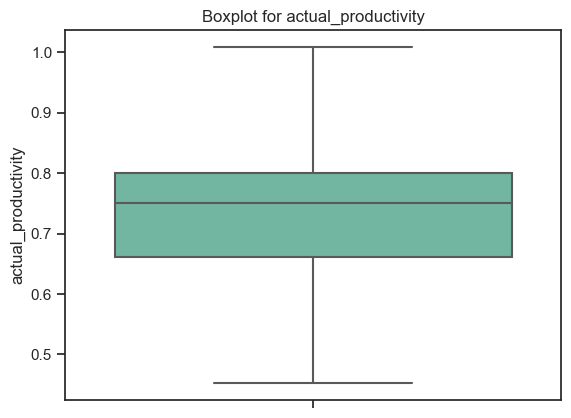

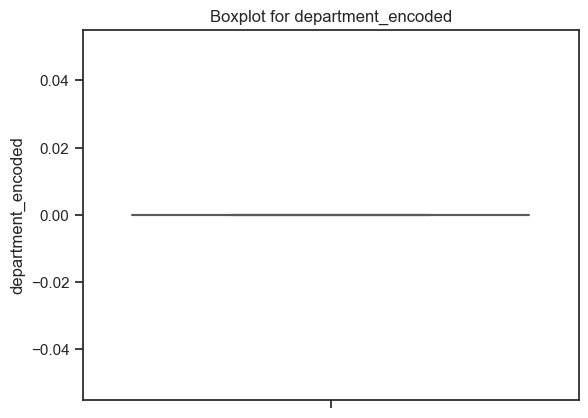

In [35]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y=df[column], palette="Set2")
        plt.title(f'Boxplot for {column}')
        plt.show()


In [36]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
department_encoded       0
dtype: int64

### Dropping Unwanted Columns

In [37]:
columns_to_exclude = ['date','department', 'quarter', 'day']
df_excluded_columns = df.drop(columns=columns_to_exclude)

In [38]:
df

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_encoded
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,43.0,0.800570,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,43.0,0.800570,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,6720,38,0.0,0,0,56.0,0.800125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,7080,45,0.0,0,0,59.0,0.750051,0
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,6960,30,0.0,0,0,58.0,0.700557,0
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,6840,30,0.0,0,0,57.0,0.700505,0
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,4560,40,0.0,0,0,43.0,0.700246,0


In [39]:
df_excluded_columns

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_encoded
0,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,0
2,11,0.80,11.41,3660,50,0.0,0,0,43.0,0.800570,0
3,12,0.80,11.41,3660,50,0.0,0,0,43.0,0.800570,0
4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,0
5,7,0.80,25.90,6720,38,0.0,0,0,56.0,0.800125,0
...,...,...,...,...,...,...,...,...,...,...,...
1187,4,0.75,26.82,7080,45,0.0,0,0,59.0,0.750051,0
1188,5,0.70,26.82,6960,30,0.0,0,0,58.0,0.700557,0
1189,8,0.70,30.48,6840,30,0.0,0,0,57.0,0.700505,0
1190,6,0.70,23.41,4560,40,0.0,0,0,43.0,0.700246,0


## Feature Selection

### Checking The Correlation Of Other Variables With The Target Variable

Text(0.5, 1.0, 'Correlation map// heatmap')

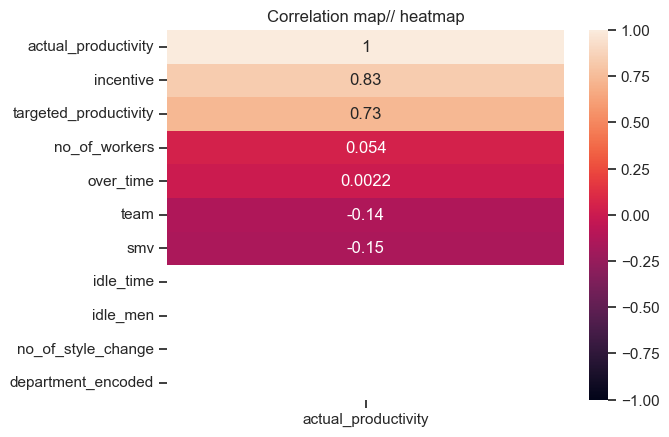

In [40]:
sns.heatmap(df_excluded_columns.corr()[['actual_productivity']].sort_values(by='actual_productivity',ascending=False),vmin=-1, vmax=1,annot=True,color='red')
plt.title('Correlation map// heatmap') 

### Taking Only The Variables Which Has Good Correlation With The Target Variable

In [41]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'department_encoded'],
      dtype='object')

### Feature Engineering

In [42]:
X = df[['targeted_productivity', 'incentive' ]]
Y = df['actual_productivity']

## Model Selection

In [43]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [44]:
for name, model in models.items():
    scores = cross_val_score(model, X,Y,cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LinearRegression
Mean Score:  0.7560204517438522
****************************************************************************************************
cross validation model : Lasso
Mean Score:  0.5246591823329738
****************************************************************************************************
cross validation model : Ridge
Mean Score:  0.744742229827333
****************************************************************************************************
cross validation model : DecisionTreeRegressor
Mean Score:  0.8006548975249258
****************************************************************************************************
cross validation model : GradientBoostingRegressor
Mean Score:  0.8165139095140725
****************************************************************************************************
cross validation model : AdaBoostRegressor
Mean Score:  0.7196875605479844
***********************************************************

In [45]:
for name, model in models.items():
    scores = cross_val_score(model, X,Y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  0.059631654537833145
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  0.0844987152235102
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  0.06106076882861876
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  0.05421034322907618
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.05183366948212089
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  0.06435925117976996
****************************************

In [46]:
r=RandomForestRegressor()

## Spliting Data

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)

## Fitting The Data

In [48]:
r.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
print("model trained with {}".format(r))
training_score = r.score(x_train, y_train)*100
testing_score = r.score(x_test, y_test)*100
score = r2_score(y_test, r.predict(x_test))*100
mae = mean_absolute_error(y_test, r.predict(x_test))
mse = mean_squared_error(y_test, r.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)


model trained with RandomForestRegressor()
r2score:  85.71704704180125
training_score:  88.71488988779899
testing_score:  85.71704704180125
mae:  0.024234394246134067
mse:  0.0024052981890750444
rmse_test:  0.04904383946098678


In [50]:
y_pred = r.predict(X)

## Creating Dataframe Of Actual And Predicted Value

In [53]:
OUTPUT = pd.DataFrame(zip(Y,y_pred), columns=("ACTUAL", "PREDICTED"))
OUTPUT

,ACTUAL,PREDICTED
0,0.940725,0.947549
1,0.800570,0.798534
2,0.800570,0.798534
3,0.800382,0.798534
4,0.800125,0.800357
...,...,...
686,0.750051,0.749620
687,0.700557,0.694885
688,0.700505,0.694885
689,0.700246,0.700350


## Plotting The Prediction

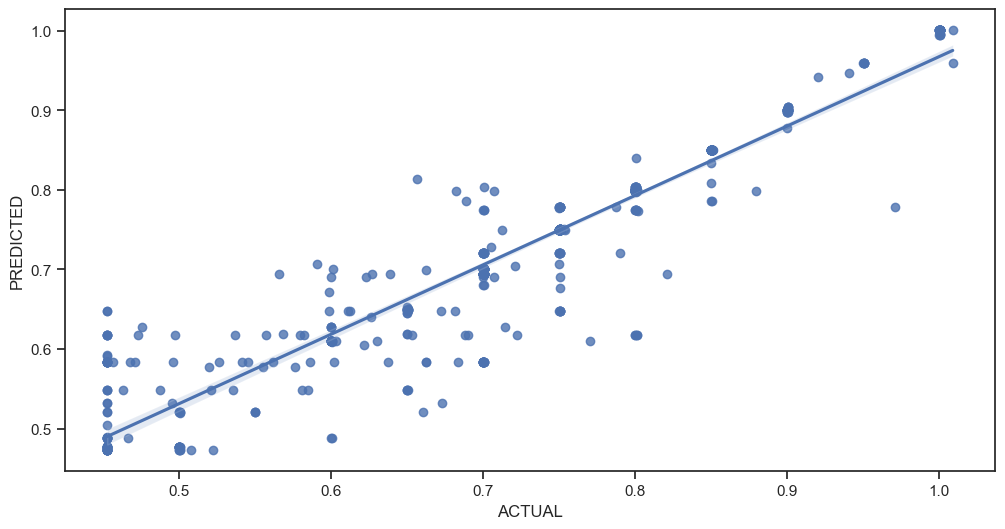

In [54]:
plt.figure(figsize=(12,6))
sns.regplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");

In [55]:
pickle.dump(model, open('MODEL1.pkl' , 'wb'))